# Blackboard for objects

In [1]:
import nbimporter
from teams import Team, Match
from players import Player
from utils import FIFA
from collections import defaultdict
import numpy as np

Importing Jupyter notebook from teams.ipynb
Importing Jupyter notebook from players.ipynb
Importing Jupyter notebook from utils.ipynb


In [2]:
football = '../data/fifa/fifa_2018.csv'
data = FIFA.load(football)

In [3]:
H = Team('Juventus', data)
A = Team('Roma', data)

In [4]:
H.selection(module={Player.DEF: 4, Player.MID: 3, Player.ATT: 3})

In [5]:
A.selection(module={Player.DEF: 4, Player.MID: 3, Player.ATT: 3})

In [6]:
match = Match(H, A, duration=90)

In [7]:
match.kickoff(verbose=True, sleep=0)

min 1: C. Marchisio is in possession
min 1: SHOOT of C. Marchisio
min 1: C. Marchisio shoots out
min 2: Alisson is in possession
min 2: Alisson fails passing to K. Strootman
min 3: G. Higuaín is in possession
min 3: SHOOT of G. Higuaín
min 3: G. Higuaín shoots out
min 4: Alisson is in possession
min 4: Alisson fails passing to A. Kolarov
min 5: P. Dybala is in possession
min 5: H. Moreno intercept passage of P. Dybala
min 6: H. Moreno is in possession
min 6: H. Moreno fails passing to A. Florenzi
min 7: M. Mandžukić is in possession
min 7: K. Manolas intercept passage of M. Mandžukić
min 8: K. Manolas is in possession
min 8: K. Manolas fails passing to H. Moreno
min 9: M. Mandžukić is in possession
min 9: M. Mandžukić fails passing to C. Marchisio
min 10: K. Manolas is in possession
min 10: SHOOT of K. Manolas
min 10: GOAL! K. Manolas scores for Roma
min 11: C. Marchisio is in possession
min 11: SHOOT of C. Marchisio
min 11: Alisson saves on C. Marchisio
min 12: Alisson is in possessio

In [8]:
print (match.score)
print (["{} ({}')".format(p.name, m) for m, p in match.scorers])

{'Juventus': 2, 'Roma': 2}
["K. Manolas (10')", "M. Mandžukić (23')", "P. Dybala (79')", "E. Džeko (88')"]


## Stats

In [9]:
H = Team('Juventus', data)
A = Team('FC Barcelona', data)
H.selection(module={Player.DEF: 4, Player.MID: 3, Player.ATT: 3})
A.selection(module={Player.DEF: 4, Player.MID: 3, Player.ATT: 3})

winners = {H.name: 0, A.name: 0, 'X': 0}
scorers = defaultdict(lambda: 0)
for m in range(100):
    match = Match(H, A, duration=90)
    match.kickoff(verbose=False, sleep=0)
    if match.score[H.name] > match.score[A.name]:
        winners[H.name] += 1
    elif match.score[A.name] > match.score[H.name]:
        winners[A.name] += 1
    else:
        winners['X'] += 1
    for m, p in match.scorers:
        scorers[p.name] += 1

In [10]:
print (winners)

{'Juventus': 35, 'FC Barcelona': 38, 'X': 27}


In [11]:
for k, v in sorted(scorers.items(), key=lambda x: -x[1]):
    print (k, v)

M. Mandžukić 36
P. Dybala 35
L. Suárez 34
O. Dembélé 34
L. Messi 32
G. Higuaín 29
I. Rakitić 9
C. Marchisio 8
B. Matuidi 7
Sergio Busquets 6
M. Pjanić 5
Iniesta 5
A. Barzagli 4
Nélson Semedo 3
Jordi Alba 3
Piqué 1
Alex Sandro 1
M. Benatia 1
S. Umtiti 1


# Visualization

In [12]:
football = '../data/fifa/fifa_2018.csv'
data = FIFA.load(football)
H = Team('Juventus', data)
A = Team('Napoli', data)
H.selection(module={Player.DEF: 4, Player.MID: 4, Player.ATT: 2})
A.selection(module={Player.DEF: 4, Player.MID: 3, Player.ATT: 3})

In [13]:
match = Match(H, A, duration=90)

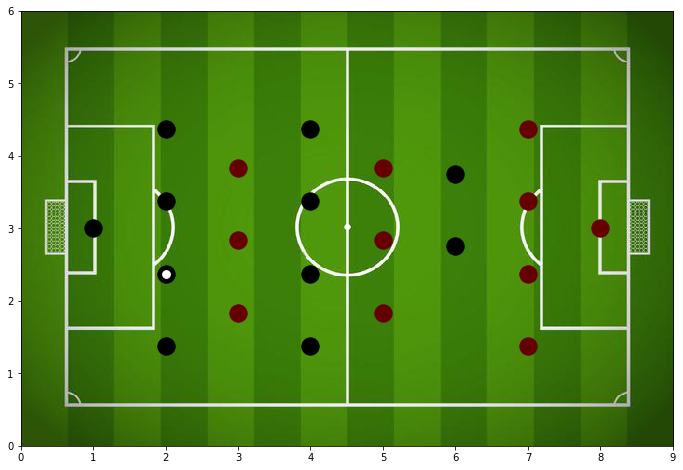

min 90: Alex Sandro is in possession
min 90: Alex Sandro passes to M. Pjanić


In [14]:
match.kickoff(show=True, sleep=2, verbose=True)

In [15]:
print (match.score)

{'Juventus': 3, 'Napoli': 1}


In [16]:
print (match.scorers)

[(12, D. Mertens, 3, A: 0.825, D: 0.36666666666666664, P: 0.775), (16, G. Chiellini, 1, A: 0.555, D: 0.9133333333333333, P: 0.59), (25, G. Higuaín, 3, A: 0.895, D: 0.1733333333333333, P: 0.67), (48, P. Dybala, 3, A: 0.835, D: 0.18, P: 0.77)]
